In [1]:
import numpy as np
import matplotlib.pyplot as plt
from trion.analysis import demod
from trion.analysis.signals import signal_colormap
from matplotlib import colors, cm
import pandas as pd
from tqdm import tqdm
import cmocean


In [2]:
df = np.load("step_approach_000.npz")
df = pd.DataFrame(data={k.lower(): v for k, v in df.items()})
df["sig_b"] = df["sig_a"].copy()*0.1

In [3]:
avg = demod.shd_binning(df)

In [4]:
midp = demod.bin_midpoints(len(avg))

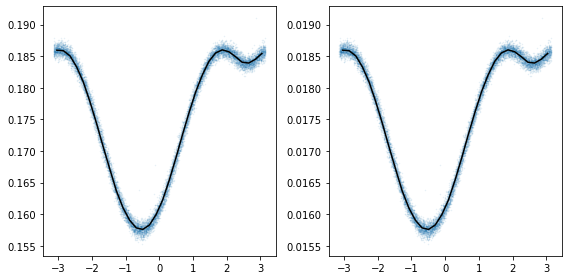

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))
for i, k in enumerate(["sig_a", "sig_b"]):
    plt.sca(axes[i])
    plt.plot(df["tap_p"], df[k], '.', ms=1, alpha=0.1)
    plt.plot(midp, avg[k], "k-")
plt.tight_layout()

In [15]:
spec1 = {k: np.fft.rfft(avg[k].to_numpy(), axis=0)/len(avg) for k in avg.columns}
spec1_df = pd.DataFrame(spec1)
spec2 = avg.apply(np.fft.rfft, axis=0)/len(avg)


In [16]:
spec1_df == spec2

,sig_a,sig_b
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


In [17]:
spec2

,sig_a,sig_b
0,0.174988+0.000000j,1.749884e-02+0.000000e+00j
1,0.005700+0.004216j,5.700013e-04+4.215897e-04j
2,-0.000557-0.001864j,-5.569588e-05-1.864402e-04j
3,0.000141-0.000392j,1.409115e-05-3.923247e-05j
4,0.000120-0.000086j,1.198230e-05-8.600815e-06j
5,0.000081+0.000011j,8.090698e-06+1.122911e-06j
6,0.000016+0.000023j,1.604181e-06+2.273015e-06j
7,0.000000+0.000015j,2.078488e-08+1.462158e-06j
8,-0.000003+0.000014j,-2.581656e-07+1.440292e-06j
9,-0.000000-0.000001j,-3.330946e-08-1.305213e-07j


In [18]:
spec3 = demod.shd(df)

In [19]:
spec3 == spec2

,sig_a,sig_b
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True
